# Using Python for Research Homework: Week 3, Case Study 2

In this case study, we will find and plot the distribution of word frequencies for each translation of Hamlet.  Perhaps the distribution of word frequencies of Hamlet depends on the translation --- let's find out!

In [75]:
# DO NOT EDIT THIS CODE!
import os
import pandas as pd
import numpy as np
from collections import Counter

def count_words_fast(text):
    text = text.lower()
    skips = [".", ",", ";", ":", "'", '"', "\n", "!", "?", "(", ")"]
    for ch in skips:
        text = text.replace(ch, "")
    word_counts = Counter(text.split(" "))
    return word_counts

def word_stats(word_counts):
    num_unique = len(word_counts)
    counts = word_counts.values()
    return (num_unique, counts)

### Exercise 1 

In this case study, we will find and visualize summary statistics of the text of different translations of Hamlet. For this case study, functions `count_words_fast` and `word_stats` are already defined as in the Case 2 Videos (Videos 3.2.x).

#### Instructions 
- Read in the data as a pandas dataframe using `pd.read_csv`. Use the `index_col` argument to set the first column in the csv file as the index for the dataframe. The data can be found at https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@hamlets.csv

In [76]:
hamlets = pd.read_csv("asset-v1_HarvardX+PH526x+2T2019+type@asset+block@hamlets.csv",index_col=0)
hamlets

,language,text
1,English,The Tragedie of Hamlet\n ...
2,German,"Hamlet, Prinz von Dännemark.\n ..."
3,Portuguese,HAMLET\n DRAMA EM ...


### Exercise 2 

In this exercise, we will summarize the text for a single translation of Hamlet in a `pandas` dataframe. 

#### Instructions
- Find the dictionary of word frequency in `text` by calling `count_words_fast()`. Store this as `counted_text`.
- Create a `pandas` dataframe named `data`.
- Using `counted_text`, define two columns in data:
    - `word`, consisting of each unique word in text.
    - `count`, consisting of the number of times each word in `word` is included in the text.

In [77]:
language, text = hamlets.loc[1]

# Enter your code here.
counted_text=count_words_fast(text)
data=pd.DataFrame()
data['word']=counted_text.keys()
data['count']=counted_text.values()

### Exercise 3

In this exercise, we will continue to define summary statistics for a single translation of Hamlet. 

#### Instructions
- Add a column to data named `length`, defined as the length of each word.
- Add another column named `frequency`, which is defined as follows for each word in `data`:
    - If `count > 10`, `frequency` is "frequent".
    - If `1 < count <= 10`, `frequency` is "infrequent".
    - If `count == 1`, `frequency` is "unique".

In [80]:
# write your code here!
length=[len(k) for k in data['word']]
frequency=[]
for f in data['count']:
    if f>10:
        frequency.append('frequent')
    if 1<f<=10:
        frequency.append('infrequent')
    if f==1:
        frequency.append('unique')
data['length']=length
data['frequency']=frequency


### Exercise 4

In this exercise, we will summarize the statistics in data into a smaller pandas dataframe. 

#### Instructions 
- Create a `pandas` dataframe named `sub_data` including the following columns:
    - `language`, which is the language of the text (defined in Exercise 2).
    - `frequency`, which is a list containing the strings "frequent", "infrequent", and "unique".
    - `mean_word_length`, which is the mean word length of each value in frequency.
    - `num_words`, which is the total number of words in each frequency category.

In [88]:
# write your code here!
sub_data=pd.DataFrame()
frequent_index=(np.where(data['frequency']=='frequent'))[0]
infrequent_index=(np.where(data['frequency']=='infrequent'))[0]
unique_index=(np.where(data['frequency']=='unique'))[0]

frequent_words_length=data['length'].iloc[frequent_index]
infrequent_words_length=data['length'].iloc[infrequent_index]
unique_words_length=data['length'].iloc[unique_index]

num_words=[len(frequent_index),len(infrequent_index),len(unique_index)]
mean_word_length=[np.mean(frequent_words_length),np.mean(infrequent_words_length),np.mean(unique_words_length)]


sub_data['frequency']=['frequent','infrequent','unique']
sub_data['mean_word_length']=mean_word_length
sub_data['num_words']=num_words
sub_data['language']=language


In [89]:
sub_data

,frequency,mean_word_length,num_words,language
0,frequent,4.371517,323,English
1,infrequent,5.825243,1442,English
2,unique,7.005675,3348,English


### Exercise 5

In this exercise, we will join all the data summaries for text Hamlet translation.

#### Instructions 
- The previous code for summarizing a particular translation of Hamlet is consolidated into a single function called `summarize_text`. Create a pandas dataframe` grouped_data` consisting of the results of `summarize_text` for each translation of Hamlet in `hamlets`.
    - Use a `for` loop across the row indices of `hamlets` to assign each translation to a new row.
    - Obtain the `ith` row of `hamlets` to variables using the `.iloc` method, and assign the output to variables `language` and `text`.
    - Call `summarize_text` using `language` and `text`, and assign the output to `sub_data`.
    - Use the pandas `.append()` function to append to pandas dataframes row-wise to `grouped_data`.

In [105]:
def summarize_text(language, text):
    counted_text = count_words_fast(text)

    data = pd.DataFrame({
        "word": list(counted_text.keys()),
        "count": list(counted_text.values())
    })
    
    data.loc[data["count"] > 10,  "frequency"] = "frequent"
    data.loc[data["count"] <= 10, "frequency"] = "infrequent"
    data.loc[data["count"] == 1,  "frequency"] = "unique"
    
    data["length"] = data["word"].apply(len)
    
    sub_data = pd.DataFrame({
        "language": language,
        "frequency": ["frequent","infrequent","unique"],
        "mean_word_length": data.groupby(by = "frequency")["length"].mean(),
        "num_words": data.groupby(by = "frequency").size()
    })
    
    return(sub_data)
    
# write your code here!
for i in range(1,len(hamlets)+1):
    language,text=hamlets.loc[i]
    sub_data=summarize_text(language,text)
    if i ==1:
        grouped_data=sub_data
    else:
        grouped_data=pd.concat([grouped_data,sub_data])
        
  
grouped_data


,language,frequency,mean_word_length,num_words
frequency,,,,
frequent,English,frequent,4.371517,323
infrequent,English,infrequent,5.825243,1442
unique,English,unique,7.005675,3348
frequent,German,frequent,4.528053,303
infrequent,German,infrequent,6.481830,1596
unique,German,unique,9.006987,5582
frequent,Portuguese,frequent,4.417625,261
infrequent,Portuguese,infrequent,6.497870,1643
unique,Portuguese,unique,8.669778,5357


### Exercise 6

In this exercise, we will plot our results and look for differences across each translation.

#### Instructions 
- Plot the word statistics of each translations on a single plot. Note that we have already done most of the work for you.
- Consider: do the word statistics differ by translation?

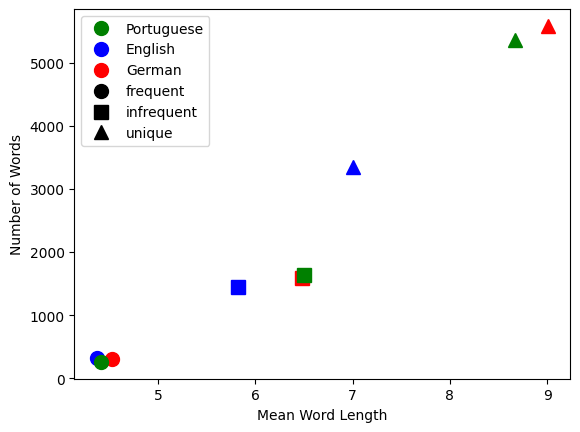

In [106]:
colors = {"Portuguese": "green", "English": "blue", "German": "red"}
markers = {"frequent": "o","infrequent": "s", "unique": "^"}
import matplotlib.pyplot as plt
for i in range(grouped_data.shape[0]):
    row = grouped_data.iloc[i]
    plt.plot(row.mean_word_length, row.num_words,
        marker=markers[row.frequency],
        color = colors[row.language],
        markersize = 10
    )

color_legend = []
marker_legend = []
for color in colors:
    color_legend.append(
        plt.plot([], [],
        color=colors[color],
        marker="o",
        label = color, markersize = 10, linestyle="None")
    )
for marker in markers:
    marker_legend.append(
        plt.plot([], [],
        color="k",
        marker=markers[marker],
        label = marker, markersize = 10, linestyle="None")
    )
plt.legend(numpoints=1, loc = "upper left")

plt.xlabel("Mean Word Length")
plt.ylabel("Number of Words")
# write your code to display the plot here!
plt.show()